In [1]:
import pyhere
import sys
sys.path.insert(0, str(pyhere.here().resolve().joinpath("src")))
import utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_validate, validation_curve, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

primary_fuel_transformed
Other                       18917
Solar                       10665
Wind                         5344
dtype: int64


<AxesSubplot:xlabel='primary_fuel_transformed'>

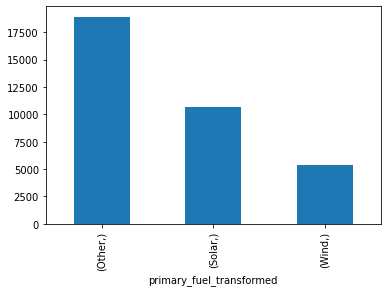

In [2]:
csv_power_plants = pd.read_csv(utils.DIR_DATA_INTERIM/"power_plants_with_generation_transformed.csv", index_col=[0])
# df_transformed = pd.read_csv(utils.DIR_DATA_EXTERNAL/"v2_transformed_data_combined_with_nasa.csv", index_col=['index'])
df_transformed = pd.read_csv(utils.DIR_DATA_EXTERNAL/"v5_transformed_data_combined_with_nasa.csv", index_col=['index'])
# csv_power_plants.loc[0:34935, ['capacity_mw', 'primary_fuel_transformed']].index.name = "index"
csv_power_plants.index.rename('index', inplace=True)
df_power_plants_raw = pd.read_csv(utils.DIR_DATA_RAW/"global_power_plant_database.csv", usecols=['name','primary_fuel', 'estimated_generation_gwh_2013'], engine='python')
csv_power_plants = csv_power_plants.join(df_power_plants_raw)

# index_set_to_delete = csv_power_plants[csv_power_plants['other_fuel1'].isin(['Solar', 'Wind'])].index.tolist()
# index_set_to_delete += (csv_power_plants[csv_power_plants['other_fuel2'].isin(['Solar', 'Wind'])].index.tolist())
# index_set_to_delete += (csv_power_plants[csv_power_plants['other_fuel3'].isin(['Solar', 'Wind'])].index.tolist())

# csv_power_plants.drop(index_set_to_delete, inplace = True)
columns_to_combine = [
                        'name',
                        'capacity_mw',
                        'primary_fuel_transformed',
                        # 'other_fuel1',
                        # 'other_fuel2',
                        # 'other_fuel3',
                        'generation_gwh_2013',
                        'generation_gwh_2014',
                        'generation_gwh_2015',
                        'generation_gwh_2016',
                        'generation_gwh_2017',
                        'generation_gwh_2018',
                        'estimated_generation_gwh_2013',
                        # 'generation_gwh_2019'
                    ]
# df_transformed_combined = df_transformed.merge(csv_power_plants.loc[0:24360, ['capacity_mw', 'primary_fuel_transformed']],left_on="index", right_on="index")
df_transformed_combined = df_transformed.merge(csv_power_plants[columns_to_combine],left_on="index", right_on="index")
print(df_transformed_combined[['primary_fuel_transformed']].value_counts())
df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

In [5]:
df_wind = df_transformed_combined[df_transformed_combined['primary_fuel_transformed']== "Wind"]
# df_wind = df_wind[~df_wind['name'].str.contains('CSP')]
df_wind

latitude  longitude  ANN_ALLSKY_SFC_LW_DWN_2013  \
index                                                    
91     -77.8428   166.7271                      198.52   
139    -45.8467   -67.4964                      298.69   
238    -37.4309   -64.7160                      324.82   
264    -39.2291   -62.6497                      324.96   
278    -28.6684   -66.7524                      330.66   
...         ...        ...                         ...   
34684    9.2351   105.8048                      419.74   
34845   10.5507   108.9300                      416.70   
34846   13.9077   109.2600                      418.29   
34896   11.0525   108.4100                      385.23   
34901   11.2122   108.2000                      385.23   

       ANN_ALLSKY_SFC_LW_DWN_2014  ANN_ALLSKY_SFC_LW_DWN_2015  \
index                                                           
91                         198.21                      192.84   
139                        297.46                      296.97   
238                        321.72                      329.16   
264                        322.29                      327.18   
278                        336.69                      339.69   
...                           ...                         ...   
34684                      419.05                      418.97   
34845                      414.06                      413.08   
34846                      416.59                      416.48   
34896                      383.91                      383.59   
34901                      383.91                      383.59   

       ANN_ALLSKY_SFC_LW_DWN_2016  ANN_ALLSKY_SFC_LW_DWN_2017  \
index                                                           
91                         190.88                      199.33   
139                        299.36                      298.11   
238                        326.42                      322.41   
264                        326.33                      324.00   
278                        337.62                      336.76   
...                           ...                         ...   
34684                      422.95                      421.57   
34845                      417.65                      418.28   
34846                      421.83                      420.14   
34896                      389.36                      389.60   
34901                      389.36                      389.60   

       ANN_ALLSKY_SFC_LW_DWN_2018  ANN_ALLSKY_SFC_LW_DWN_2019  \
index                                                           
91                         198.38                      200.32   
139                        295.96                      292.67   
238                        321.84                      315.95   
264                        323.28                      317.35   
278                        341.14                      339.40   
...                           ...                         ...   
34684                      422.48                      420.23   
34845                      416.76                      416.10   
34846                      419.06                      419.21   
34896                      388.57                      386.47   
34901                      388.57                      386.47   

       ANN_ALLSKY_SFC_LW_UP_2013  ...                                name  \
index                             ...                                       
91                          5.59  ...                         Ross Island   
139                         9.02  ...  COMODORO RIVADAVIA - ANTONIO MORAN   
238                         9.56  ...                        GENERAL ACHA   
264                         9.45  ...                    MAYOR BURATOVICH   
278                        10.25  ...        PARQUE EOLICO ARAUCO SAPEM I   
...                          ...  ...                                 ...   
34684                      10.96  ...                 Bac Lieu Wind power   
34845                

In [17]:
df_wind_attempt = df_wind[df_wind['generation_gwh_2013'].isna() & df_wind['estimated_generation_gwh_2013'].notna()]
# df_wind_attempt.loc[:,['generation_gwh_2013']] = 23.23
# df_wind_attempt.loc[:,['generation_gwh_2013']] = df_wind_attempt.loc[:,['estimated_generation_gwh_2013']].copy()
df_wind.loc[df_wind_attempt.index, ['generation_gwh_2013']] = df_wind_attempt.loc[:,['estimated_generation_gwh_2013']]

df_wind['generation_gwh_2013'].fillna(df_wind['estimated_generation_gwh_2013'], inplace=True)

# df_wind[df_wind['generation_gwh_2013'].isna()]

4133
497
677


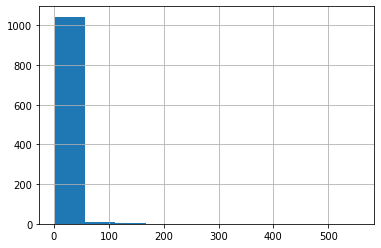

In [8]:
df_wind_alt = df_wind[df_wind['capacity_mw'].notna()]
df_wind_alt['capacity_mw'].value_counts().hist(bins=10)
print(df_wind_alt[df_wind_alt['capacity_mw'] < 50]['capacity_mw'].count())
print(df_wind_alt.loc[(df_wind_alt['capacity_mw'] >= 50) & (df_wind_alt['capacity_mw'] < 100)]['capacity_mw'].count())
print(df_wind_alt.loc[(df_wind_alt['capacity_mw'] > 100)]['capacity_mw'].count())


<AxesSubplot:>

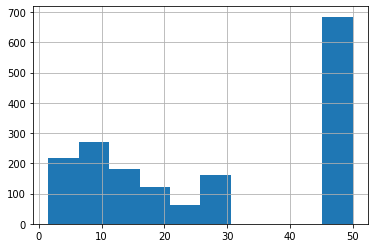

In [9]:

# df_wind_alt.loc[df_wind_alt['capacity_mw'] == (df_wind_alt['capacity_mw'].value_counts()>20)]
# indexes = df_wind_alt['capacity_mw'].isin(df_wind_alt['capacity_mw'].value_counts()>20).index
# df_wind_alt['capacity_mw'].value_counts().values>20
# df_wind_alt.loc[indexes]['capacity_mw']
# df_wind_alt[df_wind_alt['capacity_mw'] == 145]
# df_wind_alt[df_wind_alt['capacity_mw'].isin(df_wind_alt['capacity_mw'].value_counts()[df_wind_alt['capacity_mw'].value_counts()>20].index)].capacity_mw
df_wind_alt_more_than_50 = df_wind_alt[df_wind_alt['capacity_mw'].isin(df_wind_alt['capacity_mw'].value_counts()[df_wind_alt['capacity_mw'].value_counts()>50].index)]
df_wind_alt_more_than_50['capacity_mw'].hist()

In [10]:
utils.calculate_feature_mean_std(df_wind_alt)

In [11]:
# columns_delete = df_wind.columns.str.contains('WS') | df_wind.columns.str.contains('primary_fuel_transformed') | df_wind.columns.str.contains('latitude') | df_wind.columns.str.contains('longitude') | df_wind.columns.str.contains('2019') | df_wind.columns.str.contains('2012') | df_wind.columns.str.contains('2013') | df_wind.columns.str.contains('2014') | df_wind.columns.str.contains('2015') | df_wind.columns.str.contains('2016') | df_wind.columns.str.contains('2017') | df_wind.columns.str.contains('2018') |  df_wind.columns.str.contains('ANN') |  df_wind.columns.str.contains('LW') |  df_wind.columns.str.contains('WS10') | df_wind.columns.str.contains('MAX')
# columns_delete = df_wind.columns.str.contains('primary_fuel_transformed') | df_wind.columns.str.contains('latitude') | df_wind.columns.str.contains('longitude') | df_wind.columns.str.contains('2019') | df_wind.columns.str.contains('2012') | df_wind.columns.str.contains('2013') | df_wind.columns.str.contains('2014') | df_wind.columns.str.contains('2015') | df_wind.columns.str.contains('2016') | df_wind.columns.str.contains('2017') | df_wind.columns.str.contains('2018') 
columns_delete = df_wind_alt.columns.str.contains('2013') | df_wind_alt.columns.str.contains('generation_gwh_2013') | df_wind_alt.columns.str.contains('estimated_generation_gwh_2013') | df_wind_alt.columns.str.contains('name') | df_wind_alt.columns.str.contains('primary_fuel_transformed') | df_wind_alt.columns.str.contains('latitude') | df_wind_alt.columns.str.contains('longitude') | df_wind_alt.columns.str.contains('2019') | df_wind_alt.columns.str.contains('2012') | df_wind_alt.columns.str.contains('2014') | df_wind_alt.columns.str.contains('2015') | df_wind_alt.columns.str.contains('2016') | df_wind_alt.columns.str.contains('2017') | df_wind_alt.columns.str.contains('2018') 
# df_wind_2 = df_wind_alt_more_than_20.loc[:,~columns_delete]
df_wind_2 = df_wind_alt.loc[:,~columns_delete]

# CORRELATION AND MUTUAL INFORMATION SCORES

In [8]:
df_wind_2 = df_wind_2[(df_wind_2['capacity_mw'] < 100)].copy()

/home/tomas/renewable_power_plants/solar_wind_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


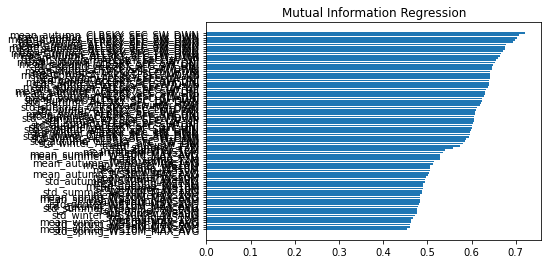

In [16]:
mi_scores = utils.make_mi_scores(df_wind_2.drop(columns=['capacity_mw']), df_wind_2[['capacity_mw']], "regression")

utils.plot_scores(mi_scores, "Mutual Information Regression")

In [13]:
X = df_wind_2.drop(columns=['capacity_mw'])
# X = df_wind_2[['capacity_mw']]
y = df_wind_2['capacity_mw']
# y
selector = SelectKBest(mutual_info_regression, k= 8)
new_X = selector.fit_transform(X, y)
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]

# # df_new_X = pd.DataFrame(new_X, index=new_X.index, columns=new_X.columns)
df_wind_2_best_k = pd.concat([features_df_new,y], axis=1)
# df_wind_2_best_k
# selector.scores_
# utils.plot_scores(selector.scores_, "Best K")
# plt.plot(selector.scores_)
# plt.xticks(np.arange(df_wind_2.drop(columns=['capacity_mw']).columns.len), list(df_wind_2.drop(columns=['capacity_mw']).columns))

In [18]:
df_wind_2_best_k

mean_winter_ALLSKY_SFC_SW_DWN  mean_summer_ALLSKY_SFC_SW_DWN  \
index                                                                 
91                          4.671111                       0.333889   
139                         2.636111                       6.199444   
238                         3.280556                       6.749444   
264                         3.137778                       6.640556   
278                         5.081111                       6.840000   
...                              ...                            ...   
34684                       5.564444                       4.536667   
34845                       6.016667                       5.543333   
34846                       4.776111                       5.628333   
34896                       5.825000                       5.141667   
34901                       5.825000                       5.141667   

       mean_autumn_ALLSKY_SFC_SW_DWN  mean_spring_ALLSKY_SFC_SW_DWN  \
index                                                                 
91                          6.752778                       0.053889   
139                         2.082778                       6.766111   
238                         2.678333                       6.987778   
264                         2.567222                       6.828889   
278                         4.163333                       7.588889   
...                              ...                            ...   
34684                       4.516667                       5.095556   
34845                       4.687222                       5.998889   
34846                       3.812222                       6.021667   
34896                       4.531111                       5.740000   
34901                       4.531111                       5.740000   

       mean_winter_CLRSKY_SFC_SW_DWN  mean_summer_CLRSKY_SFC_SW_DWN  \
index                                                                 
91                          5.534444                       0.396111   
139                         3.410000                       7.348333   
238                         4.241667                       7.638333   
264                         4.010556                       7.525000   
278                         5.493333                       8.103333   
...                              ...                            ...   
34684                       6.524444                       6.861111   
34845                       6.607778                       7.013333   
34846                       6.201111                       7.092778   
34896                       6.654444                       7.220000   
34901                       6.654444                       7.220000   

       mean_autumn_CLRSKY_SFC_SW_DWN  mean_spring_CLRSKY_SFC_SW_DWN  \
index                                                                 
91                          7.637778                       0.067222   
139                         2.632222                       8.208333   
238                         3.516111                       8.332778   
264                         3.273889                       8.252222   
278                         4.808333                       8.705556   
...                              ...                            ...   
34684                       6.115000                       6.993889   
34845                       6.162222                       7.158889   
34846                       5.810556                       7.060000   
34896                       6.211111                       7.301111   
34901                       6.211111                       7.301111   

       capacity_mw  
index               
91            1.00  
139          16.56  
238           1.80  
264           2.02  
278          25.20  
...            ...  
34684        99.00  
34845         6.00  
34846        21.00  
34896        32.00  
34901        30.00  

[5344 rows x 9 columns]

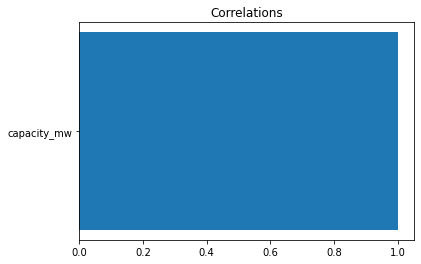

In [17]:
from matplotlib.pyplot import xlabel


# plt.bar(df_wind_2_best_k.corr().abs().unstack()['capacity_mw'].sort_values(ascending=False), height=df_wind_2_best_k.columns)
corr_matrix = df_wind_2_best_k.corr().abs()



target_correlations = corr_matrix.unstack()['capacity_mw'].sort_values(ascending=False)
# target_correlations = corr_matrix.unstack()['generation_gwh_2013'].sort_values(ascending=False)
target_correlations[target_correlations > .20]
# plt.figure(dpi=100, figsize=(4, 10))
utils.plot_scores(target_correlations[target_correlations > .20], "Correlations")

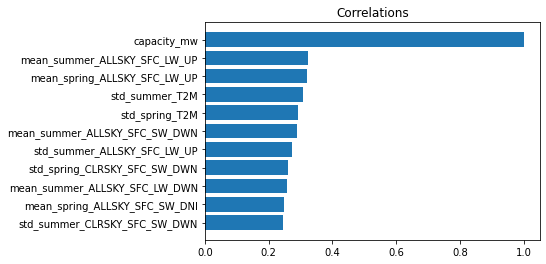

In [9]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df_wind_2.drop(columns=to_drop, inplace=True)

corr_matrix = df_wind_2.corr().abs()



target_correlations = corr_matrix.unstack()['capacity_mw'].sort_values(ascending=False)
# target_correlations = corr_matrix.unstack()['generation_gwh_2013'].sort_values(ascending=False)
target_correlations[target_correlations > .20]
# plt.figure(dpi=100, figsize=(4, 10))
utils.plot_scores(target_correlations[target_correlations > .20], "Correlations")

In [10]:
df_wind_2 = df_wind_2[target_correlations[target_correlations > .20].index]
df_wind_2

capacity_mw  mean_summer_ALLSKY_SFC_LW_UP  \
index                                              
1             10.0                     11.966667   
2             10.0                     11.966667   
17            20.0                      9.631111   
18            20.0                     11.496667   
20            20.0                     11.292222   
...            ...                           ...   
34790         30.0                     10.550000   
34795         49.0                     10.900000   
34796         10.0                     10.494444   
34894         48.0                     11.219444   
34921         47.5                     10.300556   

       mean_spring_ALLSKY_SFC_LW_UP  std_summer_T2M  std_spring_T2M  \
index                                                                 
1                         11.488333        0.334580        0.568469   
2                         11.488333        0.334580        0.568469   
17                        10.135556        0.628513        0.976169   
18                        10.470556        0.667055        0.808957   
20                        10.299444        0.823757        1.552828   
...                             ...             ...             ...   
34790                     10.728889        1.464394        1.515303   
34795                     11.173333        0.338115        0.722115   
34796                     10.517778        0.342312        0.703489   
34894                     11.207778        0.410774        0.871253   
34921                      9.885556        0.339245        0.362890   

       mean_summer_ALLSKY_SFC_SW_DWN  std_summer_ALLSKY_SFC_LW_UP  \
index                                                               
1                           7.516111                     0.059255   
2                           7.516111                     0.059255   
17                          5.350000                     0.084896   
18                          6.732222                     0.062004   
20                          6.698333                     0.084424   
...                              ...                          ...   
34790                       4.743889                     0.038873   
34795                       4.928889                     0.039101   
34796                       4.314444                     0.051668   
34894                       4.959444                     0.052426   
34921                       5.898889                     0.068033   

       std_spring_CLRSKY_SFC_SW_DWN  mean_summer_ALLSKY_SFC_LW_DWN  \
index                                                                
1                          0.089279                     349.195556   
2                          0.089279                     349.195556   
17                         0.064533                     303.821667   
18                         0.040974                     372.442778   
20                         0.072216                     370.066667   
...                             ...                            ...   
34790                      0.030822                     402.363333   
34795                      0.019255                     423.500556   
34796                      0.100607                     407.062222   
34894                      0.114523                     431.916667   
34921                      0.056125                     324.561667   

       mean_spring_ALLSKY_SFC_SW_DNI  std_summer_CLRSKY_SFC_SW_DWN  
index                                                               
1                           7.820556                      0.079873  
2                           7.820556                      0.079873  
17                          5.636111                      0.059092  
18                          6.558889                      0.054515  
20                          6.866667                      0.055474  
...                              ...                           ...  
34790                       4.023889         

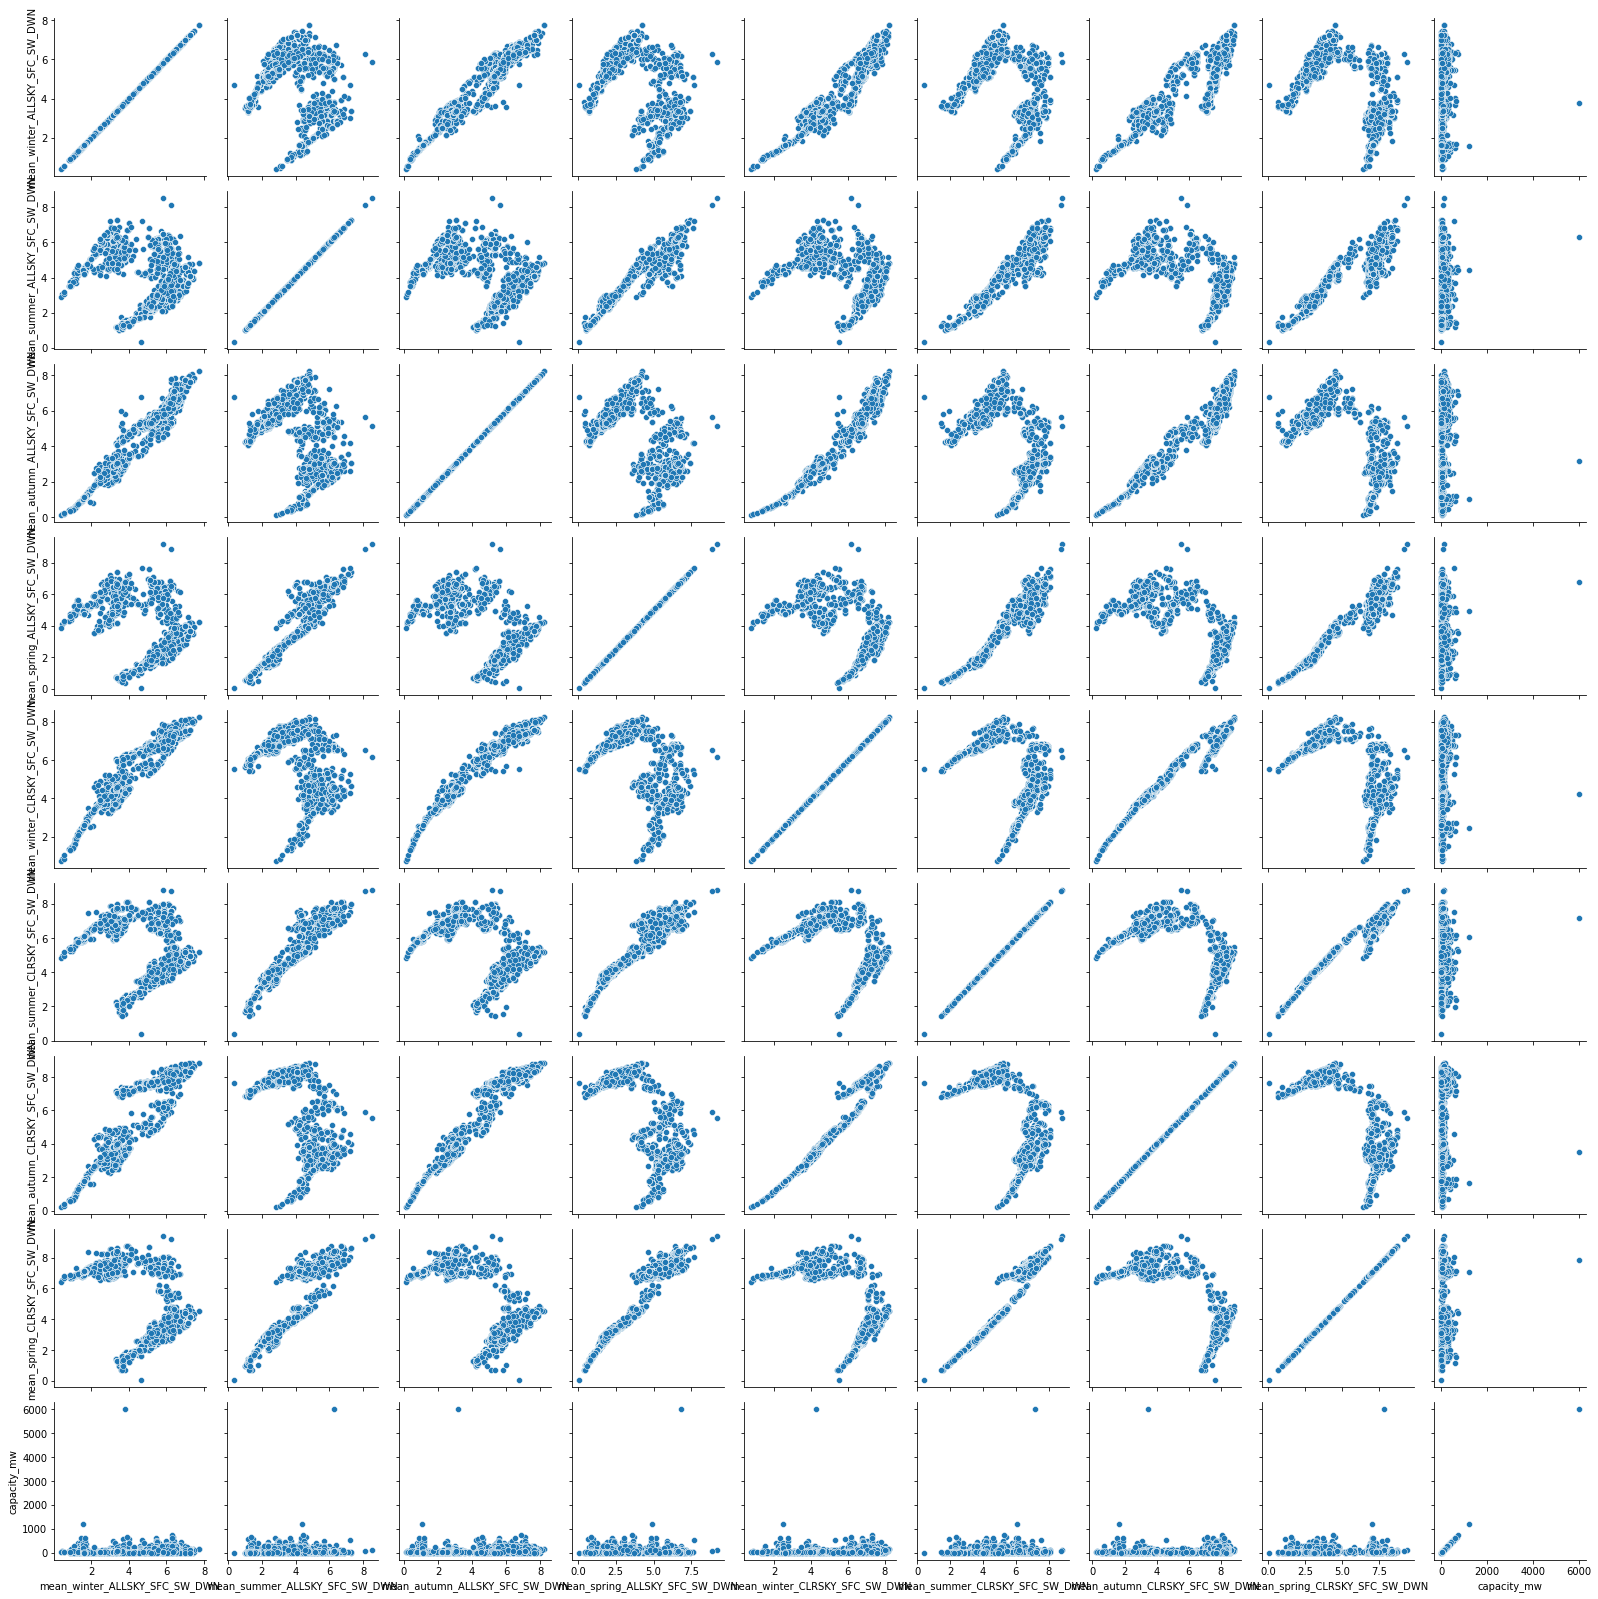

In [19]:
g = sns.PairGrid(df_wind_2_best_k)
# g = sns.PairGrid(df_wind_2)
g.map(sns.scatterplot)

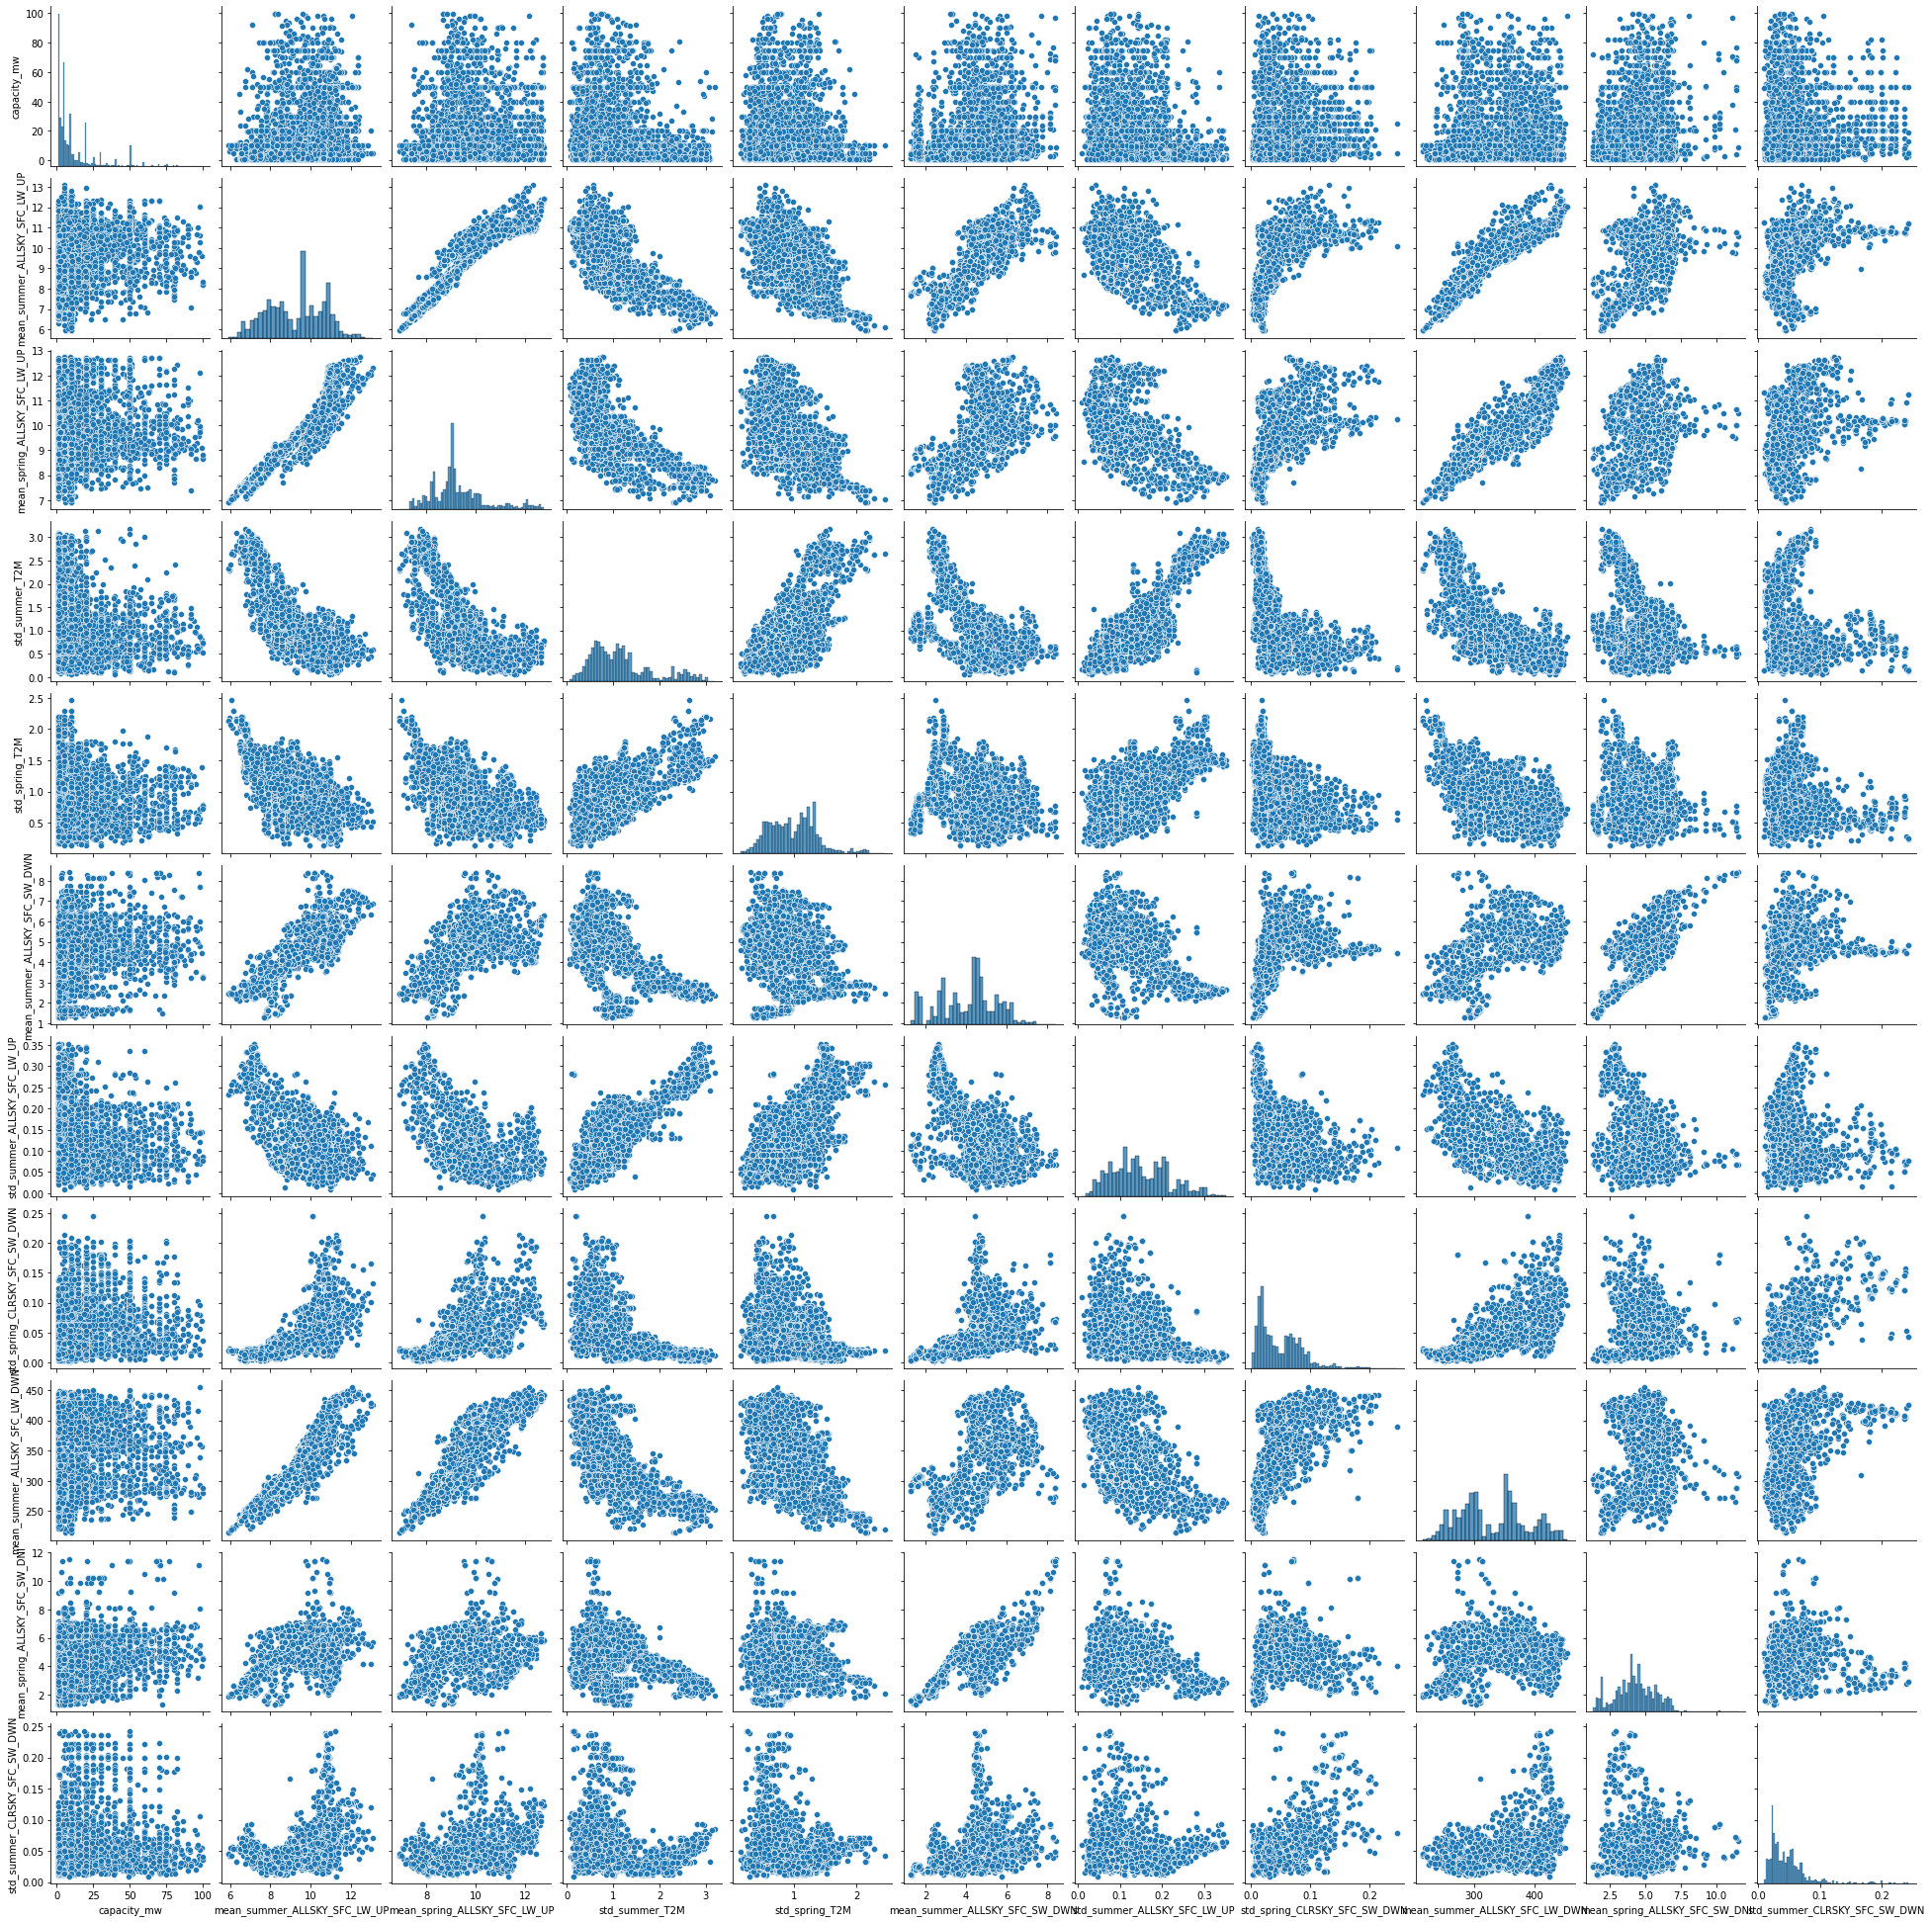

In [12]:
sns.pairplot(df_wind_2)

In [15]:
X = df_wind_3.drop(columns=['capacity_mw'])
# X = df_wind_2[['capacity_mw']]
y = df_wind_3['capacity_mw']

min_max_scaler = MinMaxScaler()

power_transformer = PowerTransformer(method='yeo-johnson')
standard_scaler = StandardScaler()


x_scaled = min_max_scaler.fit_transform(X)
# x_scaled = power_transformer.fit_transform(X)
# x_scaled = standard_scaler.fit_transform(X)
df_X_scaled = pd.DataFrame(x_scaled, index=X.index, columns=X.columns)
df_wind_3_scaled = pd.concat([df_X_scaled,y], axis=1)
df_wind_3_scaled

mean_summer_ALLSKY_SFC_LW_UP  mean_spring_ALLSKY_SFC_LW_UP  \
index                                                               
1                          0.844693                      0.784959   
2                          0.844693                      0.784959   
17                         0.517585                      0.552855   
18                         0.778867                      0.610333   
20                         0.750233                      0.580974   
...                             ...                           ...   
34790                      0.646281                      0.654656   
34795                      0.695300                      0.730912   
34796                      0.638500                      0.618435   
34894                      0.740040                      0.736822   
34921                      0.611345                      0.509961   

       std_summer_T2M  std_spring_T2M  mean_summer_ALLSKY_SFC_SW_DWN  \
index                                                                  
1            0.087091        0.188524                       0.873463   
2            0.087091        0.188524                       0.873463   
17           0.181232        0.363429                       0.570039   
18           0.193576        0.291694                       0.763658   
20           0.243765        0.610818                       0.758911   
...               ...             ...                            ...   
34790        0.448948        0.594720                       0.485136   
34795        0.088223        0.254439                       0.511051   
34796        0.089567        0.246448                       0.424981   
34894        0.111494        0.318420                       0.515331   
34921        0.088585        0.100329                       0.646926   

       std_summer_ALLSKY_SFC_LW_UP  std_spring_CLRSKY_SFC_SW_DWN  \
index                                                              
1                         0.145592                      0.356668   
2                         0.145592                      0.356668   
17                        0.220309                      0.254947   
18                        0.153602                      0.158111   
20                        0.218932                      0.286531   
...                            ...                           ...   
34790                     0.086203                      0.116380   
34795                     0.086867                      0.068832   
34796                     0.123487                      0.403233   
34894                     0.125695                      0.460434   
34921                     0.171172                      0.220387   

       mean_summer_ALLSKY_SFC_LW_DWN  mean_spring_ALLSKY_SFC_SW_DNI  \
index                                                                 
1                           0.561606                       0.636141   
2                           0.561606                       0.636141   
17                          0.372664                       0.421676   
18                          0.658409                       0.512272   
20                          0.648515                       0.542489   
...                              ...                            ...   
34790                       0.783002                       0.263390   
34795                       0.871019                       0.232519   
34796                       0.802568                       0.125886   
34894                       0.906065                       0.247518   
34921                       0.459028                       0.507691   

       std_summer_CLRSKY_SFC_SW_DWN  capacity_mw  
index                                             
1                          0.301170         10.0  
2                          0.301170         10.0  
17                         0.212130         20.0  
18                         0.192517         20.0  
20                         0.196630         20.0  
...   

In [18]:
category = pd.cut(df_wind_3_scaled['capacity_mw'], 10).cat.codes.rename('category')
df_wind_3_scaled_w_category = pd.concat([df_wind_3_scaled, category], axis=1)

In [19]:
category.value_counts()

0    7227
1    1507
2     558
4     412
3     246
5     133
7      95
6      72
9      31
8      28
Name: category, dtype: int64

<AxesSubplot:>

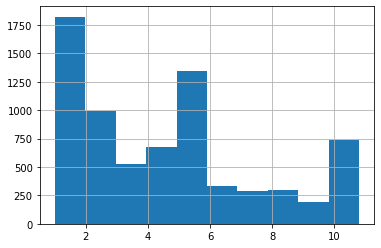

In [22]:
df_wind_3_scaled_w_category.loc[df_wind_3_scaled_w_category['category'] == 0]['capacity_mw'].hist()

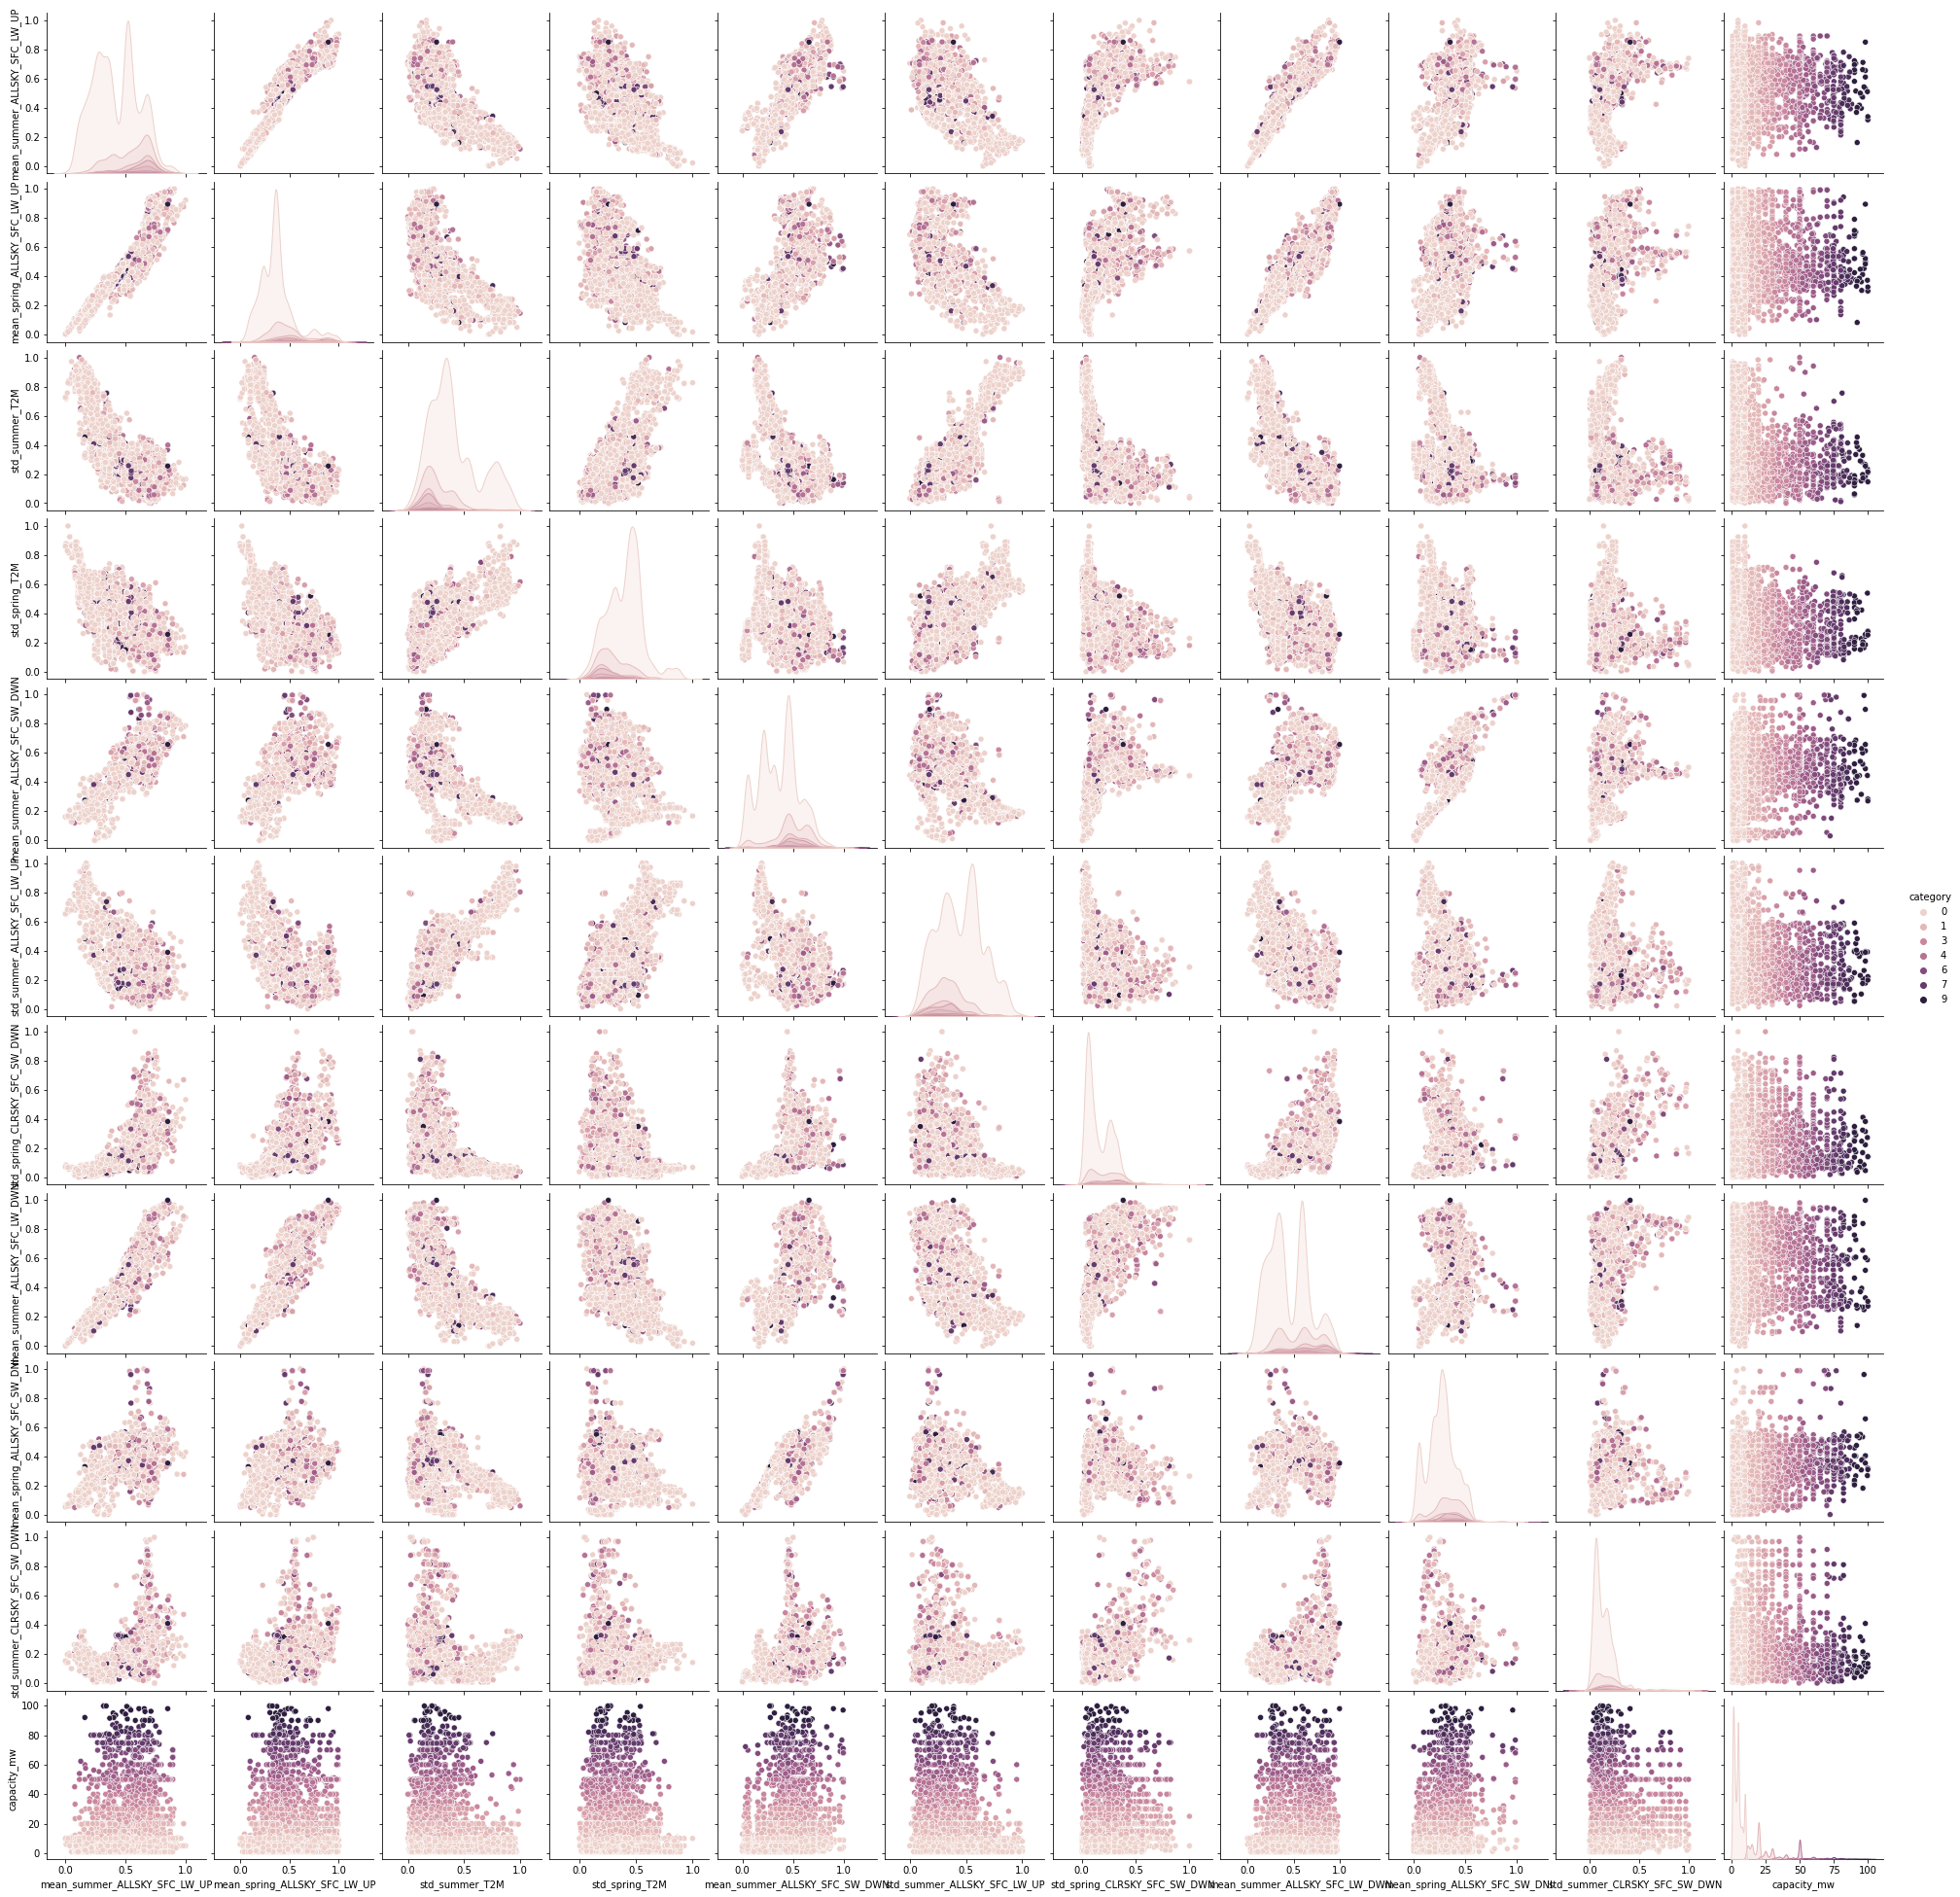

In [23]:
sns.pairplot(df_wind_3_scaled_w_category, hue='category')

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2013'>

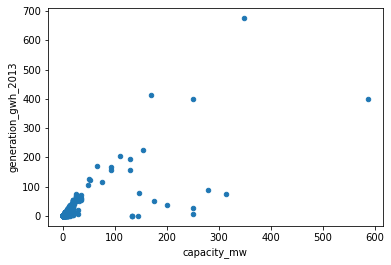

In [165]:
df_wind_2.plot.scatter(x='capacity_mw', y='generation_gwh_2013')

# LOOKING UP SPECIFIC THINGS

In [166]:
df_wind_2['generation_gwh_2013'].isna().sum()

0

In [167]:
# sns.pairplot(df_wind_2, hue="capacity_mw", height=2.5)

<AxesSubplot:>

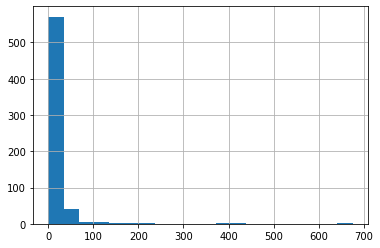

In [168]:
df_wind_2['generation_gwh_2013'].hist(bins=20)

541

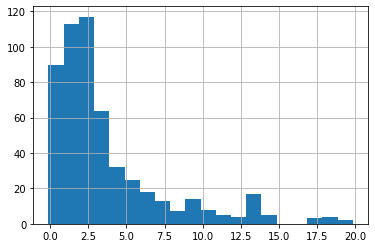

In [57]:
df_wind_2[df_wind_2['generation_gwh_2013'] < 20]['generation_gwh_2013'].hist(bins=20)
df_wind_2[df_wind_2['generation_gwh_2013'] < 20]['generation_gwh_2013'].count()

76

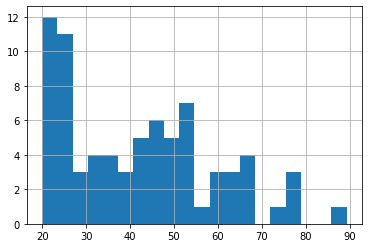

In [76]:
df_wind_2.loc[(df_wind_2['generation_gwh_2013'] >= 20) & (df_wind_2['generation_gwh_2013'] < 100)]['generation_gwh_2013'].hist(bins=20)
df_wind_2.loc[(df_wind_2['generation_gwh_2013'] >= 20) & (df_wind_2['generation_gwh_2013'] < 100)]['generation_gwh_2013'].count()

14

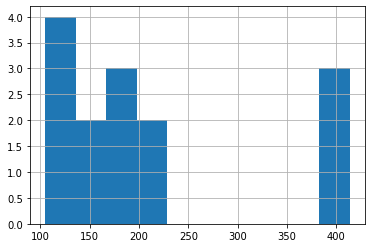

In [77]:
# df_wind_2[df_wind_2['generation_gwh_2013'] > 100]['generation_gwh_2013'].hist(bins=20)
# df_wind_2[df_wind_2['generation_gwh_2013'] > 100]['generation_gwh_2013'].count()
df_wind_2[(df_wind_2['generation_gwh_2013'] >= 100) & (df_wind_2['generation_gwh_2013'] < 500)]['generation_gwh_2013'].hist()
df_wind_2[(df_wind_2['generation_gwh_2013'] >= 100) & (df_wind_2['generation_gwh_2013'] < 500)]['generation_gwh_2013'].count()

In [78]:
df_wind_2[(df_wind_2['generation_gwh_2013'] < 500)]['generation_gwh_2013'].count()

632

In [83]:
df_wind_2[(df_wind_2['generation_gwh_2013'] >= 500)]['generation_gwh_2013'].count()

Int64Index([24873], dtype='int64', name='index')

In [87]:
df_wind_2.drop(df_wind_2[(df_wind_2['generation_gwh_2013'] >= 500)].index, inplace=True)

In [88]:
df_wind_2[(df_wind_2['generation_gwh_2013'] >= 500)]['generation_gwh_2013'].count()

0

In [89]:
a = df_wind_2[(df_wind_2['generation_gwh_2013'] < 500)]['generation_gwh_2013'].count()
b = df_wind_2[(df_wind_2['generation_gwh_2013'] >= 500)]['generation_gwh_2013'].count()
f'{np.round(b/(a + b) * 100,2)}%'

'0.0%'

In [7]:
# df_wind_2 = df_wind_2[(df_wind_2['capacity_mw'] < 500)].copy()
df_wind_2 = df_wind_2[(df_wind_2['capacity_mw'] < 100)].copy()

In [17]:
# remove high values???
df_wind_2['capacity_mw'].sort_values(ascending= False)

index
20159    99.8
20910    99.8
20460    99.8
20380    99.8
1064     99.5
         ... 
16391     1.0
9787      1.0
32683     1.0
32684     1.0
32196     1.0
Name: capacity_mw, Length: 10316, dtype: float64

In [18]:
# df_wind.loc[18177, ["latitude", "longitude", "capacity_mw"]]

# X AND Y

In [20]:
X = df_wind_2_best_k.drop(columns=['capacity_mw'])
# X = df_wind_2[['capacity_mw']]
y = df_wind_2_best_k['capacity_mw']

In [21]:
X = X.reindex(sorted(X.columns), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)

# DECISION TREE REGRESSOR

50


<AxesSubplot:>

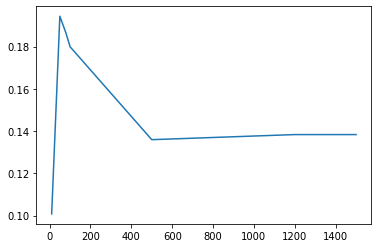

In [22]:
candidate_max_leaf_nodes = [10, 50, 80, 100, 500, 1200, 1500]
results = {}

results = {node: utils.get_accuracy_tree("regression",node, X_train, X_test, y_train, y_test) for node in candidate_max_leaf_nodes}
best_tree_size = max(results, key=results.get)
print(best_tree_size)
sns.lineplot(data=results, x= results.keys(), y= results.values())

In [1]:

# Define model. Specify a number for random_state to ensure same results each run
tree_model = DecisionTreeRegressor(random_state=1)

# Fit model
tree_model.fit(X_train, y_train)

NameError: name 'DecisionTreeRegressor' is not defined

In [18]:
y_pred = tree_model.predict(X_test)

In [19]:

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

7.912450843830382
199.7864295811234


In [20]:
tree_model.score(X_test, y_test)

0.27787801122126077

(array([[1.447e+03, 2.890e+02, 1.080e+02, 4.200e+01, 9.200e+01, 2.600e+01,
         2.200e+01, 2.600e+01, 5.000e+00, 5.000e+00],
        [1.348e+03, 3.660e+02, 2.230e+02, 6.200e+01, 4.500e+01, 8.000e+00,
         1.000e+00, 6.000e+00, 1.000e+00, 2.000e+00]]),
 array([ 1.  , 10.88, 20.76, 30.64, 40.52, 50.4 , 60.28, 70.16, 80.04,
        89.92, 99.8 ]),
 <a list of 2 BarContainer objects>)

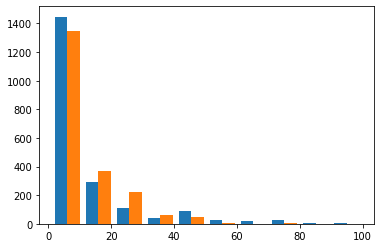

In [44]:
plt.hist([y_test, y_pred])

/home/tomas/renewable_power_plants/solar_wind_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capacity_mw', ylabel='capacity_mw'>

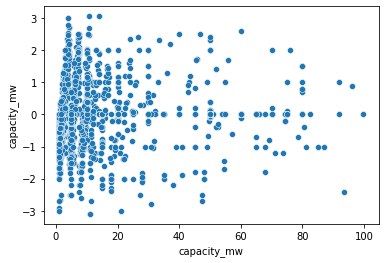

In [379]:
residuals = y_test - y_pred
sns.scatterplot(y_test, residuals)

/home/tomas/renewable_power_plants/solar_wind_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capacity_mw', ylabel='capacity_mw'>

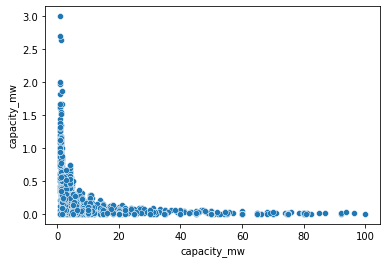

In [380]:
ap_residuals = np.abs(residuals) / y_test

sns.scatterplot(y_test, ap_residuals)

/home/tomas/renewable_power_plants/solar_wind_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/tomas/renewable_power_plants/solar_wind_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capacity_mw', ylabel='capacity_mw'>

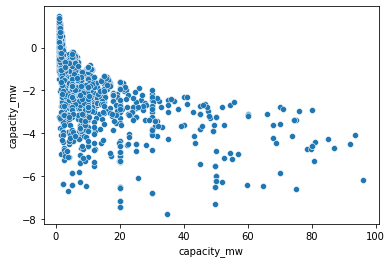

In [366]:
lap_residuals = np.log(ap_residuals)
sns.scatterplot(y_test, lap_residuals)

<BarContainer object of 2062 artists>

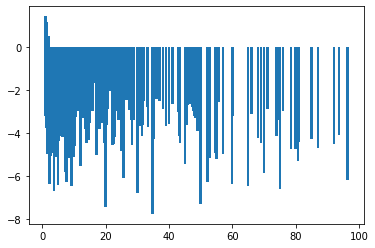

In [367]:
plt.bar(y_test, lap_residuals)

ValueError: supplied range of [-inf, 1.6486586255873816] is not finite

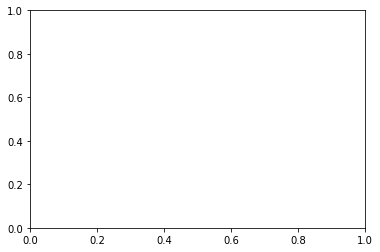

In [342]:
plt.hist(lap_residuals, bins=100, density=1, histtype='step', cumulative=True)

# RANDOM FOREST REGRESSOR

In [47]:
# Numbers of trees
n_estimators = [int(x) for x in np.arange(10, 101, 10)]
# Numbers of features to consider at every split
# max_features = [1, "sqrt", "log2"]
# Maximum numbers of levels in tree
max_depth = [50, 100, 500]
# Minimum numbers of samples required to split a node
min_samples_split = [2, 10, 50 ]
# Minimum numbers of samples required at each leaf node
min_samples_leaf = [1, 10, 50, 100]
# Method of selecting samples for training each tree
bootstrap = [True, False]

max_leaf_nodes = [10, 100, 500]

param_grid = {
                'n_estimators': n_estimators,
                # 'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap,
                'max_leaf_nodes': max_leaf_nodes
            }



In [50]:

# rf_grid = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, cv=5, verbose = 2, n_jobs=4)
rf_grid = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = param_grid, n_iter = 10, cv=5, verbose = 2, n_jobs=4)

In [51]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=100, max_leaf_nodes=100, min_samples_leaf=50, min_samples_split=2, n_estimators=60; total time=   4.1s
[CV] END bootstrap=False, max_depth=100, max_leaf_nodes=100, min_samples_leaf=50, min_samples_split=2, n_estimators=60; total time=   4.2s
[CV] END bootstrap=False, max_depth=100, max_leaf_nodes=100, min_samples_leaf=50, min_samples_split=2, n_estimators=60; total time=   4.2s
[CV] END bootstrap=False, max_depth=100, max_leaf_nodes=100, min_samples_leaf=50, min_samples_split=2, n_estimators=60; total time=   4.6s
[CV] END bootstrap=True, max_depth=500, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=2, n_estimators=80; total time=   2.5s
[CV] END bootstrap=True, max_depth=500, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=2, n_estimators=80; total time=   2.6s
[CV] END bootstrap=True, max_depth=500, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=2, n_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [50, 100, 500],
                                        'max_leaf_nodes': [10, 100, 500],
                                        'min_samples_leaf': [1, 10, 50, 100],
                                        'min_samples_split': [2, 10, 50],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   verbose=2)

In [52]:
rf_grid.best_params_

{'n_estimators': 80,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_leaf_nodes': 100,
 'max_depth': 500,
 'bootstrap': True}

In [53]:
rf_grid.score(X_test, y_test)

0.34305437373937986

In [21]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

7.693299005672695


In [22]:
rf_model.score(X_test, y_test)

0.35108943258456393

(array([[1447.,  289.,  108.,   42.,   92.,   26.,   22.,   26.,    5.,
            5.],
        [1328.,  367.,  255.,   65.,   37.,    4.,    6.,    0.,    0.,
            0.]]),
 array([ 1.  , 10.88, 20.76, 30.64, 40.52, 50.4 , 60.28, 70.16, 80.04,
        89.92, 99.8 ]),
 <a list of 2 BarContainer objects>)

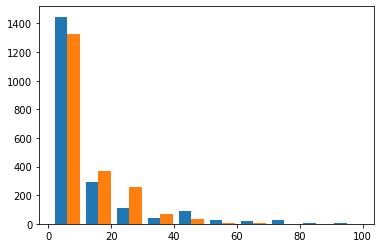

In [23]:
plt.hist([y_test, y_pred])

/home/tomas/renewable_power_plants/solar_wind_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/tomas/renewable_power_plants/solar_wind_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capacity_mw', ylabel='capacity_mw'>

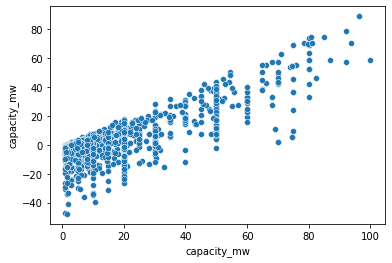

In [24]:
residuals = y_test - y_pred
ap_residuals = np.abs(residuals) / y_test
lap_residuals = np.log(ap_residuals)

sns.scatterplot(y_test, residuals)


/home/tomas/renewable_power_plants/solar_wind_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capacity_mw', ylabel='capacity_mw'>

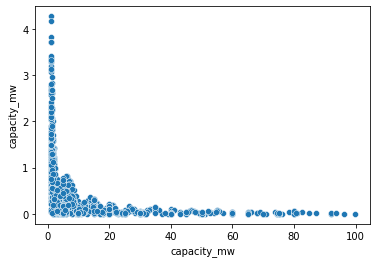

In [347]:

sns.scatterplot(y_test, ap_residuals)

/home/tomas/renewable_power_plants/solar_wind_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capacity_mw', ylabel='capacity_mw'>

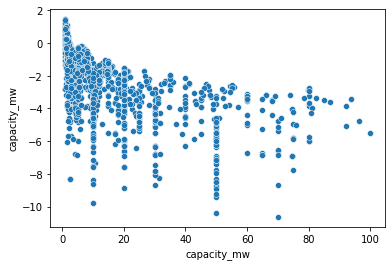

In [348]:

sns.scatterplot(y_test, lap_residuals)

/home/tomas/renewable_power_plants/solar_wind_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/matplotlib/transforms.py:2052: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx
/home/tomas/renewable_power_plants/solar_wind_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/matplotlib/transforms.py:396: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


<BarContainer object of 2062 artists>

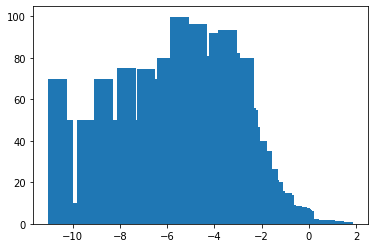

In [349]:
plt.bar(lap_residuals,y_test)

ValueError: supplied range of [-8.046314429606786, inf] is not finite

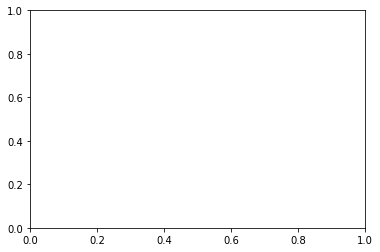

In [87]:
plt.hist(lap_residuals, bins=100, density=1, histtype='step', cumulative=True)

# LASSO, RIDGE, LINEAR REGRESSION

In [25]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train,y_train)

ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train,y_train)

linreg_model = LinearRegression()
linreg_model.fit(X_train,y_train)

y_pred = lasso_model.predict(X_test)
print("Lasso")
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(lasso_model.score(X_test, y_test))

y_pred = linreg_model.predict(X_test)
print("Linear Regression")
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(linreg_model.score(X_test, y_test)
)
y_pred = ridge_model.predict(X_test)
print("Ridge")
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(ridge_model.score(X_test, y_test))

Lasso
9.88011136687016
236.52071467265975
0.14510305216982888
Linear Regression
9.853393901341
235.8473879896244
0.14753677103887675
Ridge
9.85644956851787
235.91236823726925
0.1473019019050772


/home/tomas/renewable_power_plants/solar_wind_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.102e+04, tolerance: 2.034e+02
  model = cd_fast.enet_coordinate_descent(


# SCALLING

In [24]:
# X_train_normalized = stats.boxcox(X_train)
x = X_train.values #returns a numpy array
min_max_scaler = MinMaxScaler()
power_transformer = PowerTransformer(method='yeo-johnson')
standard_scaler = StandardScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# x_scaled = power_transformer.fit_transform(x)
x_scaled = standard_scaler.fit_transform(x)
X_train_scaled = pd.DataFrame(x_scaled, index=X_train.index, columns=X_train.columns)

x = X_test.values #returns a numpy array
# x_scaled = min_max_scaler.fit_transform(x)
# x_scaled = power_transformer.fit_transform(x)
x_scaled = standard_scaler.fit_transform(x)
X_test_scaled = pd.DataFrame(x_scaled, index=X_test.index, columns=X_test.columns)

x = X.values #returns a numpy array
# x_scaled = min_max_scaler.fit_transform(x)
# x_scaled = power_transformer.fit_transform(x)
x_scaled = standard_scaler.fit_transform(x)
X_scaled = pd.DataFrame(x_scaled, index=X.index, columns=X.columns)


# KNN

6


<AxesSubplot:>

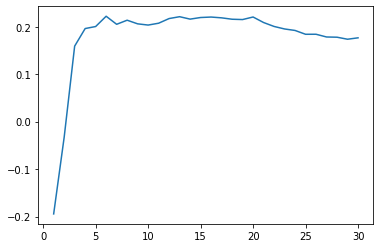

In [25]:
candidate_n_neighbors = np.arange(1,31)
results = {}

# results = {n: utils.get_accuracy_knn(n, X_train_scaled_pca, X_test_scaled_pca, y_train, y_test) for n in candidate_n_neighbors}
results = {n: utils.get_accuracy_knn("regression",n, X_train, X_test, y_train, y_test) for n in candidate_n_neighbors}
best_n_neighbors = max(results, key=results.get)
print(best_n_neighbors)
sns.lineplot(data=results, x= results.keys(), y= results.values())

# POLYNOMIAL FEATURES

In [26]:
polynomial_features = PolynomialFeatures(2)
polynomial_features.fit_transform(X)

array([[ 1.        ,  6.75277778,  7.63777778, ..., 21.81927901,
        25.85200494, 30.63007531],
       [ 1.        ,  2.08277778,  2.63222222, ...,  6.94908179,
         8.98913889, 11.6281    ],
       [ 1.        ,  2.67833333,  3.51611111, ..., 10.76204475,
        13.91502315, 17.99173611],
       ...,
       [ 1.        ,  3.81222222,  5.81055556, ..., 22.81123735,
        29.61719568, 38.45377901],
       [ 1.        ,  4.53111111,  6.21111111, ..., 33.930625  ,
        38.76213889, 44.28163086],
       [ 1.        ,  4.53111111,  6.21111111, ..., 33.930625  ,
        38.76213889, 44.28163086]])

In [27]:
model_scaled_poly_knn = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(2),
    KNeighborsRegressor(n_neighbors = 7)
)

model_scaled_poly_knn.fit(X_train, y_train)
model_scaled_poly_knn.score(X_test, y_test)

0.2179554375800158

In [28]:
results = cross_validate(KNeighborsRegressor(n_neighbors = 7), X, y, cv=5)
results

{'fit_time': array([0.01212502, 0.01032591, 0.00984788, 0.00678682, 0.00671721]),
 'score_time': array([0.01612949, 0.00870728, 0.01401901, 0.01211286, 0.01150608]),
 'test_score': array([-0.01028935, -0.20728341, -1.07621821,  0.02043114,  0.10985773])}

# VALIDATION AND LEARNING CURVE
https://scikit-learn.org/stable/modules/learning_curve.html

In [29]:
train_scores, test_scores = validation_curve(
    KNeighborsRegressor(),
    X,
    y,
    param_name = "n_neighbors",
    param_range = candidate_n_neighbors,
    cv = 5
)

In [30]:
np.mean(train_scores, axis=1)

array([0.53968172, 0.39641867, 0.39384528, 0.37279435, 0.34133481,
       0.32545229, 0.29677847, 0.28594724, 0.27783205, 0.2678897 ,
       0.25852991, 0.2512337 , 0.24354589, 0.23755824, 0.22990433,
       0.22315771, 0.21919416, 0.21321372, 0.20954875, 0.20648021,
       0.20436537, 0.20104159, 0.1981616 , 0.19576134, 0.19362597,
       0.19054049, 0.18801068, 0.18531273, 0.18351423, 0.18203008])

In [31]:
candidate_n_neighbors.shape[0]

30

([<matplotlib.axis.XTick at 0x7f3efa1096d0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30')])

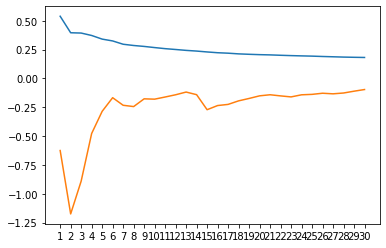

In [32]:
plt.plot(np.mean(train_scores, axis=1))
plt.plot(np.mean(test_scores, axis=1))
plt.xticks(np.arange(candidate_n_neighbors.shape[0]), candidate_n_neighbors)

In [33]:
lc = learning_curve(Lasso(alpha=0.01), X, y, cv=5)
# lc = learning_curve(KNeighborsRegressor(n_neighbors = 7), X, y, cv=5)
samples, train, test = lc[0], lc[1], lc[2]

/home/tomas/renewable_power_plants/solar_wind_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.000e+06, tolerance: 2.925e+02
  model = cd_fast.enet_coordinate_descent(
/home/tomas/renewable_power_plants/solar_wind_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.110e+05, tolerance: 4.608e+02
  model = cd_fast.enet_coordinate_descent(
/home/tomas/renewable_power_plants/solar_wind_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-p

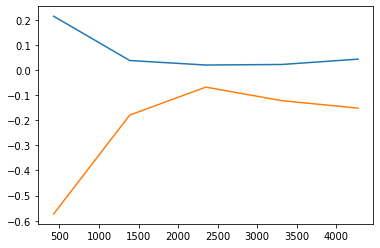

In [34]:
plt.plot(samples, np.mean(train, axis=1))
plt.plot(samples, np.mean(test, axis=1))